In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

!pip install japanize-matplotlib
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns
sns.set(font="IPAexGothic") #日本語フォント設定

     |████████████████████████████████| 4.1MB 3.5MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120193 sha256=3fd0794104163b6da982b255c37dd1e1c953f5a6f6e12d60b57781d039eda39c
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive 
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
df = pd.read_csv("drive/My Drive/統計/Pokemon.csv")
df.head()

In [ ]:
total = df["Total"].values
total[:10]

array([318, 405, 525, 625, 309, 405, 534, 634, 634, 314])

無作為抽出

In [ ]:
#復元抽出
np.random.choice([1,2,3] , 3)

array([3, 1, 3])

In [ ]:
#非復元抽出
np.random.choice([1,2,3] , 3 , replace = False)

array([2, 1, 3])

In [ ]:
#標本平均
np.random.seed(0)
sample = np.random.choice(total , 200)
sample.mean()

424.990

In [ ]:
for i in range(10):
  sample = np.random.choice(total , 200)
  sample_mean = sample.mean() 
  print(f"{i + 1}回目の無作為抽出で得た標本平均:" , sample_mean)

1回目の無作為抽出で得た標本平均: 432.37
2回目の無作為抽出で得た標本平均: 432.63
3回目の無作為抽出で得た標本平均: 420.84
4回目の無作為抽出で得た標本平均: 435.78
5回目の無作為抽出で得た標本平均: 434.71
6回目の無作為抽出で得た標本平均: 422.61
7回目の無作為抽出で得た標本平均: 436.315
8回目の無作為抽出で得た標本平均: 428.055
9回目の無作為抽出で得た標本平均: 434.63
10回目の無作為抽出で得た標本平均: 424.135


In [ ]:
#母平均
total.mean()

435.103

確率分布<br>
いかさまさいころを使用したあれこれ

In [ ]:
dice = [1,2,3,4,5,6]
prob = [1/21 , 2/21 , 3/21 , 4/21 , 5/21 , 6/21]

In [ ]:
#それぞれの確率でさいころが出るような装置を作成
np.random.choice(dice , p=prob)

6

In [ ]:
#100回試行してみる。
num_trial = 100
sample = np.random.choice(dice , num_trial , p = prob)
sample

array([6, 4, 2, 6, 5, 6, 6, 6, 4, 6, 4, 3, 5, 5, 4, 2, 4, 5, 6, 2, 5, 3,
       5, 4, 6, 4, 3, 6, 6, 5, 2, 3, 4, 5, 1, 5, 4, 4, 4, 6, 5, 6, 5, 4,
       4, 3, 5, 6, 1, 6, 6, 4, 6, 4, 4, 3, 6, 1, 3, 4, 5, 4, 5, 3, 4, 5,
       5, 3, 3, 1, 6, 1, 4, 3, 5, 6, 4, 5, 5, 2, 6, 6, 6, 3, 4, 4, 4, 2,
       6, 1, 3, 5, 3, 6, 5, 6, 3, 6, 6, 5])

In [ ]:
#度数分布表の作成
freq , _ = np.histogram(sample , bins = 6 , range=(1,7))
pd.DataFrame({"度数":freq , "相対度数":freq/num_trial} ,
             index = pd.Index(np.arange(1,7) , name='出目'))

#こうやって見ると確率分布に沿った結果が得られている

,度数,相対度数
出目,,
1,6,0.06
2,6,0.06
3,15,0.15
4,24,0.24
5,22,0.22
6,27,0.27


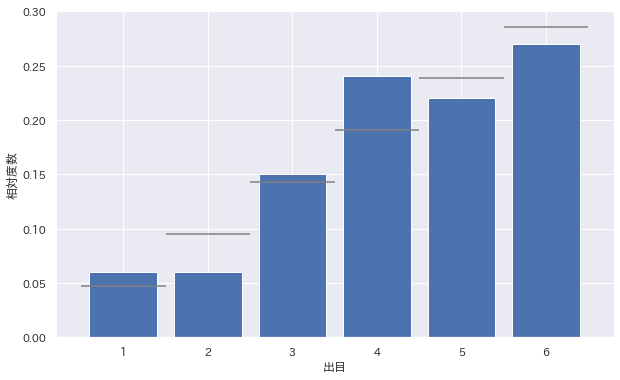

In [ ]:
#ヒストグラム（100回行った場合）
fig = plt.figure(figsize=(10 , 6))
ax = fig.add_subplot(111)
ax.hist(sample , bins = 6 , range = (1,7) , density = True , rwidth=0.8)
ax.hlines(prob , np.arange(1,7) , np.arange(2,8) , colors='gray')#それぞれの確率である線を引く
ax.set_xticks(np.linspace(1.5 , 6.5 , 6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('出目')
ax.set_ylabel('相対度数')
plt.show()

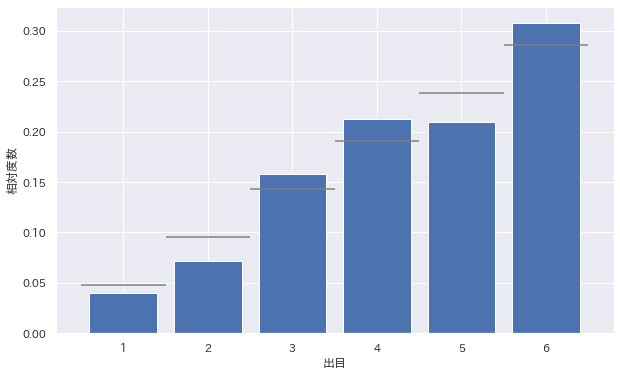

In [ ]:
#ヒストグラム（500回行った場合）
num_trial = 500
sample = np.random.choice(dice , num_trial , p = prob)
fig = plt.figure(figsize=(10 , 6))
ax = fig.add_subplot(111)
ax.hist(sample , bins = 6 , range = (1,7) , density = True , rwidth=0.8)
ax.hlines(prob , np.arange(1,7) , np.arange(2,8) , colors='gray')#それぞれの確率である線を引く
ax.set_xticks(np.linspace(1.5 , 6.5 , 6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('出目')
ax.set_ylabel('相対度数')
plt.show()

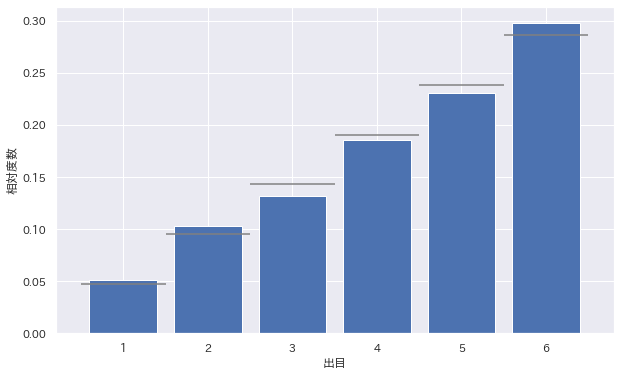

In [ ]:
#ヒストグラム（1000回行った場合）
num_trial = 1000
sample = np.random.choice(dice , num_trial , p = prob)
fig = plt.figure(figsize=(10 , 6))
ax = fig.add_subplot(111)
ax.hist(sample , bins = 6 , range = (1,7) , density = True , rwidth=0.8)
ax.hlines(prob , np.arange(1,7) , np.arange(2,8) , colors='gray')#それぞれの確率である線を引く
ax.set_xticks(np.linspace(1.5 , 6.5 , 6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('出目')
ax.set_ylabel('相対度数')
plt.show()

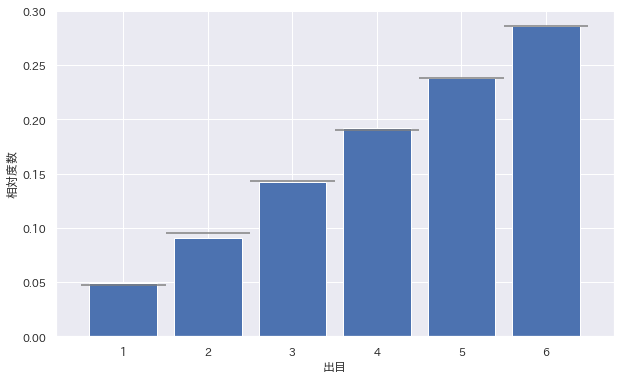

In [ ]:
#ヒストグラム（10000回行った場合）
num_trial = 10000
sample = np.random.choice(dice , num_trial , p = prob)
fig = plt.figure(figsize=(10 , 6))
ax = fig.add_subplot(111)
ax.hist(sample , bins = 6 , range = (1,7) , density = True , rwidth=0.8)
ax.hlines(prob , np.arange(1,7) , np.arange(2,8) , colors='gray')#それぞれの確率である線を引く
ax.set_xticks(np.linspace(1.5 , 6.5 , 6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('出目')
ax.set_ylabel('相対度数')
plt.show()
#10000回ぐらい行うと設定した確率と同じような分布になってきている。

In [ ]:
np.max(total)

780

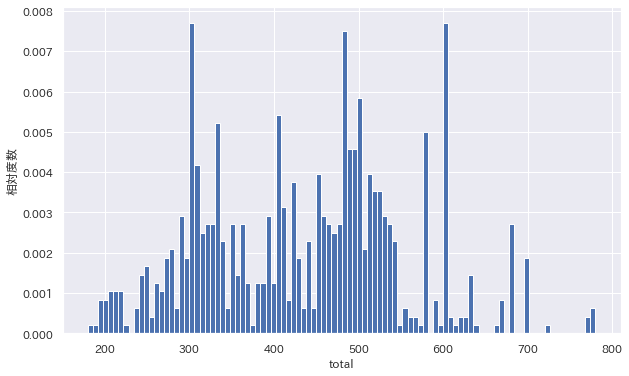

In [ ]:
#ヒストグラム（total）
fig = plt.figure(figsize=(10 , 6))
ax = fig.add_subplot(111)
ax.hist(total , bins = 100 , density = True)

ax.set_xlabel('total')
ax.set_ylabel('相対度数')
plt.show()

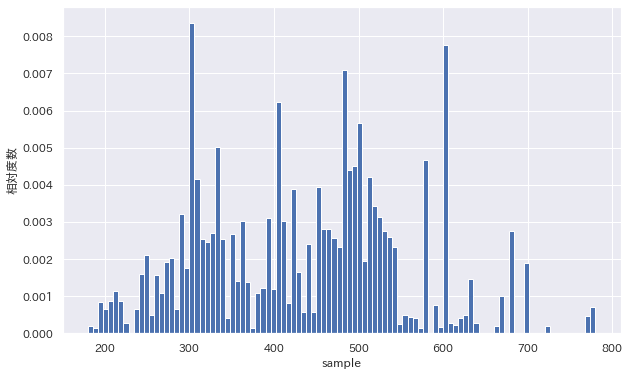

In [ ]:
#ヒストグラム（totalから無作為抽出したもの）
sample = np.random.choice(total , 10000)
fig = plt.figure(figsize=(10 , 6))
ax = fig.add_subplot(111)
ax.hist(sample , bins = 100 , density = True)

ax.set_xlabel('sample')
ax.set_ylabel('相対度数')
plt.show()

#無作為抽出したものも似たような分布になっていることが分かる。

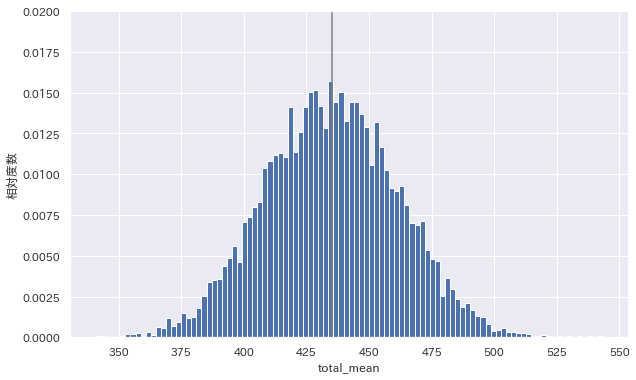

In [ ]:
#標本平均の分布を見てみる。
#標本平均の分布は母集団から標本を抽出し、そこから求めた平均を何回も行う。
#その結果をプロットしたもの


sample_mean = [np.random.choice(total , 20).mean() for _ in range(10000)]
fig = plt.figure(figsize=(10 , 6))
ax = fig.add_subplot(111)
ax.hist(sample_mean , bins = 100 , density = True)
ax.vlines(np.mean(total) ,0,1, "gray")#母集団の平均の線
ax.set_ylim(0 , 0.02)
ax.set_xlabel('total_mean')
ax.set_ylabel('相対度数')
plt.show()

#こうやって見ると母平均は中心に分布することが分かる。